<a href="https://colab.research.google.com/github/akiabe/udemy_PyTorch_DNN/blob/master/pytorch_simpleRNN_sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

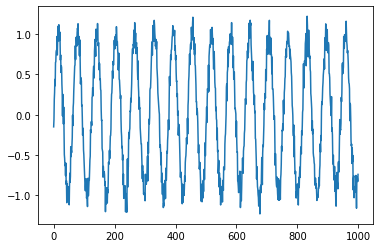

In [ ]:
N = 1000
series = np.sin(0.1*np.arange(N)) + np.random.randn(N)*0.1
plt.plot(series)
plt.show()

In [ ]:
T = 10
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y).reshape(-1, 1)
print(X.shape)
print(Y.shape)

N = len(X)
print(N)

(990, 10, 1)
(990, 1)
990


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
class SimpleRNN(nn.Module):
  def __init__(self, n_inputs, n_hidden, n_rnnlayers, n_outputs):
    super(SimpleRNN, self).__init__()
    self.D = n_inputs
    self.M = n_hidden
    self.K = n_outputs
    self.L = n_rnnlayers

    self.rnn = nn.RNN(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        nonlinearity="relu",
        batch_first=True
    )
    self.fc = nn.Linear(self.M, self.K)
  
  def forward(self, X):
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    out, _ = self.rnn(X, h0)
    out = self.fc(out[:, -1, :])
    return out

In [ ]:
model = SimpleRNN(n_inputs=1, n_hidden=15, n_rnnlayers=1, n_outputs=1)
model.to(device)

SimpleRNN(
  (rnn): RNN(1, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=1, bias=True)
)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))

In [ ]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
print(type(X_train))
print(type(X_test))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [ ]:
def full_gd(model, criterion, optimizer, X_train, y_train, X_test, y_test, epochs=1000):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)
  for it in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses[it] = loss.item()

    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[it] = test_loss.item()

    if (it+1) % 5 == 0:
      print(f"Epoch {it+1}/{epochs}, Train loss: {loss.item():.4f}, Test loss: {test_loss.item():.4f}")
  
  return train_losses, test_losses

In [ ]:
train_losses, test_losses = full_gd(model, criterion, optimizer, X_train, y_train, X_test, y_test, epochs=1000)

Epoch 5/1000, Train loss: 0.5783, Test loss: 0.5643
Epoch 10/1000, Train loss: 0.5573, Test loss: 0.5440
Epoch 15/1000, Train loss: 0.5373, Test loss: 0.5242
Epoch 20/1000, Train loss: 0.5172, Test loss: 0.5043
Epoch 25/1000, Train loss: 0.4970, Test loss: 0.4843
Epoch 30/1000, Train loss: 0.4764, Test loss: 0.4638
Epoch 35/1000, Train loss: 0.4551, Test loss: 0.4424
Epoch 40/1000, Train loss: 0.4323, Test loss: 0.4195
Epoch 45/1000, Train loss: 0.4074, Test loss: 0.3944
Epoch 50/1000, Train loss: 0.3798, Test loss: 0.3666
Epoch 55/1000, Train loss: 0.3499, Test loss: 0.3368
Epoch 60/1000, Train loss: 0.3190, Test loss: 0.3065
Epoch 65/1000, Train loss: 0.2897, Test loss: 0.2781
Epoch 70/1000, Train loss: 0.2647, Test loss: 0.2551
Epoch 75/1000, Train loss: 0.2492, Test loss: 0.2402
Epoch 80/1000, Train loss: 0.2335, Test loss: 0.2243
Epoch 85/1000, Train loss: 0.2187, Test loss: 0.2106
Epoch 90/1000, Train loss: 0.2063, Test loss: 0.1985
Epoch 95/1000, Train loss: 0.1942, Test loss: 0

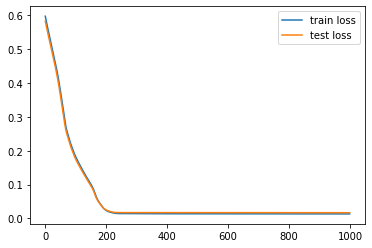

In [ ]:
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

In [ ]:
valid_target = Y[-N//2:]
valid_preds = []
last_x = X_test[0].view(T)
#print(last_x.shape)

print(last_x[0:])
print(last_x[1:])


while len(valid_preds) < len(valid_target):
  input_ = last_x.reshape(1, T, 1)
  #print(input_.shape)
  p = model(input_)
  #print(p.shape)
  valid_preds.append(p[0,0].item())
  last_x = torch.cat((last_x[1:], p[0]))

tensor([-0.8042, -0.6674, -0.3479, -0.5071, -0.3208, -0.1494, -0.0677,  0.0928,
        -0.0954,  0.2011])
tensor([-0.6674, -0.3479, -0.5071, -0.3208, -0.1494, -0.0677,  0.0928, -0.0954,
         0.2011])


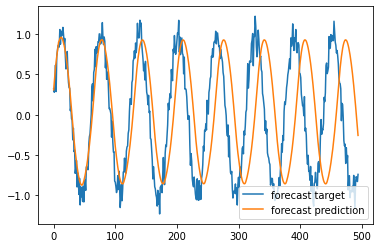

In [ ]:
plt.plot(valid_target, label="forecast target")
plt.plot(valid_preds, label="forecast prediction")
plt.legend()
plt.show()